In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:53<00:00, 3198470.14it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


frog  bird  ship  plane


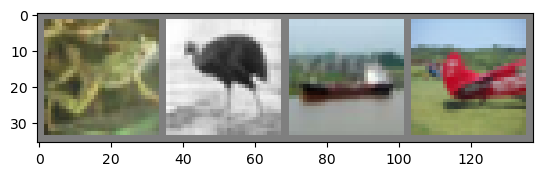

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# function to show images

def imshow(img):
    img = img /2 + 0.5 #normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show

#get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [21]:
Xtr_rows = trainset.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072
    

(tensor([[[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          ...,
          [-0.1137, -0.1294, -0.1765,  ..., -0.4353, -0.4353, -0.4353],
          [-0.1294, -0.1843, -0.2235,  ..., -0.4667, -0.4510, -0.3882],
          [-0.1686, -0.2235, -0.2549,  ..., -0.3882, -0.3804, -0.3725]],
 
         [[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          ...,
          [-0.0588, -0.0745, -0.1216,  ..., -0.3647, -0.3725, -0.3725],
          [-0.0745, -0.1294, -0.1686,  ..., -0.4118, -0.4039, -0.3412],
          [-0.1137, -0.1686, -0.2000,  ..., -0.3333, -0.3333, -0.3255]],
 
         [[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,

In [29]:
import pickle
def unpickle(file):

 fo = open(file, 'rb')
 dict = pickle.load(fo, encoding ='latin1')
 X = dict['data']
 fo.close()
 return dict

data = unpickle('cifar-10-batches-py/test_batch')

In [53]:
tr1 = unpickle('cifar-10-batches-py/data_batch_1')
tr2 = unpickle('cifar-10-batches-py/data_batch_2')
tr3 = unpickle('cifar-10-batches-py/data_batch_3')
tr4 = unpickle('cifar-10-batches-py/data_batch_4')
tr5 = unpickle('cifar-10-batches-py/data_batch_5')

In [55]:
from collections import defaultdict

dicts = [tr1, tr2, tr3, tr4, tr5]

super_dict = defaultdict(set)  # uses set to avoid duplicates

for d in dicts:
    for k, v in d.items():  # use d.iteritems() in python 2
        super_dict[k].add(v)

TypeError: unhashable type: 'list'

In [59]:
big_dict = {}
for k in dicts[0]:
    big_dict[k] = [d[k] for d in dicts]

In [60]:
big_dict["data"] = [item for sublist in big_dict["data"] for item in sublist]

In [63]:
big_dict["labels"] = [item for sublist in big_dict["labels"] for item in sublist]

In [78]:
Xtr_rows = np.vstack(big_dict["data"])


In [79]:
Xtr_rows.shape

(50000, 3072)

In [81]:
Xte_rows = np.vstack(data["data"])
Xte_rows.shape

(10000, 3072)

In [88]:
class NN(object):
    def __init__(self):
        pass

    def train(self, X, y):
        ''' X is N x D where each row is an example. Y is 1-dimension of size N'''
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y
    
    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test)

        # loop over all test rows
        for i in range(num_test):
    
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

            return Ypred

In [94]:
Ytr = big_dict["labels"]
Ytr = np.array(Ytr)

Yte = data["labels"]
Yte = np.array(Yte)

In [90]:
nn = NN() # create a Nearest Neighbor classifier class
nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xte_rows) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print ('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

accuracy: 0.100000


In [91]:
class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

In [95]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xte_rows) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print ('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

KeyboardInterrupt: 